<h2><center> 10-701 Introduction to Machine Learning (PhD) <br> Lecture 3: Estimating Probabilities </center></h2> 


<h3><center> Leila Wehbe <br> Carnegie Mellon University  <br> Machine Learning Department </center></h3> 


Lecture based on Chapter 2 from Tom Mitchell's [book](http://www.cs.cmu.edu/~tom/mlbook.html),  and on Kilian Weinberger's [lecture](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote01_MLsetup.html)

#### Lecture outcomes
- More formal setup of ML algorithms
- Probability review
- MLE and MAP


### Links (use the version you need)


- [Notebook](https://github.com/lwehbe/10701/blob/F22/Lecture_03_estimating_probabilities.ipynb)

- [PDF slides](https://github.com/lwehbe/10701/raw/F22/Lecture_03_estimating_probabilities.pdf)

## Function approximation

Problem Setting:
- Set of possible instances $X$
- Unknown target function $f : X\rightarrow Y$
- Set of function hypotheses $H=\{ h | h : X\rightarrow Y \}$

Input:
- Training examples $\{(x^{(i)},y^{(i)})\}$ of unknown target function $f$

Output:
- Hypothesis $h\in H$ that best approximates target function $f$

## Function approximation - More formally

Problem Setting: Our training data is denoted:

$$ D = \{({\bf x}_1,y_1),({\bf x}_2,y_2),...,({\bf x}_n,y_n)\} \subset \mathcal{R}^d\times \mathcal{C}$$

- $({\bf x}_i,y_i)$ are sampled from an (unknown) distribution $P(X,Y).$

- $\mathcal{R}$ is the feature space:
    - example attribute can be binary ($\mathcal{R} = \mathcal{N}^d$), real ($\mathcal{R} = \mathcal{R}^d$) or other 
- $\mathcal{C}$ is the label space:
    - Binary Classification: $\mathcal{C}$ is $\{0,1\}$ or $\{-1,1\}$  
    - Multiclass Classification:  $\mathcal{C} = \{1,2,...,K\}$ 
    - Regression: $\mathcal{C} = \mathbb{R}$


## Choosing $H$

- Choosing the hypothesis class:
    - encodes important assumptions about the type of problem we are trying to learn
    
- [No free lunch theorem](https://en.wikipedia.org/wiki/No_free_lunch_theorem):
    - every successful ML algorithm must make assumptions
    - no single ML algorithm that works for every setting


## Choosing $h \in H$

- find $h$ by choosing an appropriate loss function $\mathcal{L}(h)$ and finding the $h^*$ that minimizes it.

- Examples of loss functions (we will see more in the course):

- Zero-one loss:
    - count how many mistakes
    - rarely used for optimization because not continuous - used to evaluate classifiers
    
    $$\mathcal{L}_{0/1}(h) = \frac{1}{n} \sum_{i=1}^n I({h({\bf x}_i)\ne y_i}),$$ $$ ~ ~ ~ \text{where}  ~ ~ ~ I({h({\bf x}_i)\ne y_i}) = \begin{cases}
    1,& \text{if } h({\bf x}_i)\ne y_i\\
    0,              & \text{otherwise}
\end{cases}  $$
    


## Choosing $h \in H$

- Squared loss:
    - typically used in regression settings
    - loss grows quadratically, encourages no predictions to be really far off
    - if prediction is really close, not encouraged to be exact
    
    $$\mathcal{L}_{sq}(h) = \frac{1}{n} \sum_{i=1}^n ({h({\bf x}_i) -  y_i})^2 $$
    

## Choosing $h \in H$

    
- Absolute loss:
    - typically used in regression settings
    - less sensitive to outliers / noisy points (grows linearly)
    - encourages exact solution
    
    $$\mathcal{L}_{abs}(h) = \frac{1}{n} \sum_{i=1}^n |{h({\bf x}_i) -  y_i}| $$




### Train - test splits

- Divide your data into training and test
    - never touch the test data!
    
- Validation
    - need to choose some hyperparameters. Don't use the test data!
    - Split data into Training - Validation - Test
    - Use validation to pick hyperparameters / know when to stop etc
    
- Cross-validation
    - divide the training set into parts and iteratively use one as validation, averaging the results across folds
    - LOOCV (leave one out cross validation), 10-fold cross-validation


### Training, test and generalization errors

- learning:
$$h^* = \text{argmin}_{h\in H} \frac{1}{|D_{train}|} \sum_{({\bf x},y) \in D_{train}} \ell ({\bf x},y|h)$$

- evaluation:
$$\text{test error:} ~~ \epsilon_{\text{test}} = \frac{1}{|D_{test}|} \sum_{({\bf x},y) \in D_{test}} \ell ({\bf x},y|h^*)$$

- if the data was drawn IID from $P$, then the testing loss is an unbiased estimate of the true generalization loss:

$$\text{generalization error: } ~~ \epsilon = \mathbb{E}_{({\bf x},y)\sim P}  [\ell ({\bf x},y|h^*)]$$

### Bayes optimal classifier

- Example: Assume (and this is almost never the case) you knew $P(y|x)$, then you would simply predict the most likely label.
    - The Bayes optimal classifier predicts: $$y^∗= \text{argmax}_yP(Y=y|X={\bf x})$$
    
    
- Although the Bayes optimal classifier is as good as it gets, it still can make mistakes. It is always wrong if a sample does not have the most likely label. We can compute the probability of that happening precisely (which is exactly the error rate):


$$\epsilon_\text{BayesOpt}= 1- P(Y=y^*|X = {\bf x})$$


### Bayes optimal classifier

- Why is the Bayes optimal classifier interesting, if it cannot be used in practice? The reason is that it provides a highly informative lower bound of the error rate. With the same feature representation no classifier can obtain a lower error. 

- What to do when we don't have $P(Y |X )$?

## Probabilistic function approximation:    

<br><br><br>

<center>Instead of $f: X\rightarrow Y$, </center>

<center>learn $P(Y|X)$ </center>


## Conditional probability

$$P(A|B) = \frac{P(A, B)}{P(B)}$$



## Conditional probability

$$P(A|B) = \frac{P(A, B)}{P(B)}$$

### Corrollary: The Chain Rule:

$$P(A, B) = P(A|B)P(B)$$


## (Very) Quick recap

### Random Variables and probability tables

Example: 
- Experiment: flipping a coin
- Universe: {0 = Tails, 1 = Heads)
- Events: 0 (Tails) and 1 (Heads). 
- A: random variable indicating that the coin is heads.

$$\begin{array}{c|c} A &P(A) \\ \hline 
0& 0.8\\
1& 0.2\\ \end{array}$$



## Joint distribution

We can have multiple random variables in the same experiment.

The universe corresponds to the set of all joint settings of the variables. 

For example, if we throw the same coin three times, we can define:
- $A$: random variable that indicates that the first flip is heads.
- $B$: random variable that indicates that the second flip is heads.
- $C$: random variable that indicates that the third flip is heads.

One example of an event is:  $A = 0 \wedge B = 1 \wedge C = 0$.

We can write a probability table listing all the configuration of values for the variables:

$$\begin{array}{ccc|c} A  & B  & C & P \\
\hline
0 & 0 & 0 & 0.512\\
0 & 0 & 1 & 0.128\\
0 & 1 & 0 & 0.128\\
0 & 1 & 1 & 0.032\\
1 & 0 & 0 & 0.128\\
1 & 0 & 1 & 0.032\\
1 & 1 & 0 & 0.032\\
1 & 1 & 1 & 0.008\\
\end{array}$$


We can write a probability table listing all the configuration of values for the variables:

$$\begin{array}{ccc|c} A  & B  & C & P \\
\hline
0 & 0 & 0 & 0.512\\
0 & 0 & 1 & 0.128\\
0 & 1 & 0 & 0.128\\
0 & 1 & 1 & 0.032\\
1 & 0 & 0 & 0.128\\
1 & 0 & 1 & 0.032\\
1 & 1 & 0 & 0.032\\
1 & 1 & 1 & 0.008\\
\end{array}$$

In this coin example, the variables are independent from each other 

(you can see for yourself that $P(A|B,C) = P(A)$).



We can consider another example: we select a day at random:
- $A$: the sky is cloudy.
- $B$: the temperature is cold.
- $C$: it rains.

$$\begin{array}{ccc|c} A  & B  & C & P \\
\hline
0 & 0 & 0 & 0.3\\
0 & 0 & 1 & 0.1\\
0 & 1 & 0 & 0.15\\
0 & 1 & 1 & 0.05\\
1 & 0 & 0 & 0.05\\
1 & 0 & 1 & 0.1\\
1 & 1 & 0 & 0.1\\
1 & 1 & 1 & 0.15\\
\end{array}$$




### Joint distribution
$\begin{array}{ccc|c} A - \text{cloudy} & B - \text{cold} & C - \text{rain} & P \\
\hline
0 & 0 & 0 & 0.3\\
0 & 0 & 1 & 0.1\\
0 & 1 & 0 & 0.15\\
0 & 1 & 1 & 0.05\\
1 & 0 & 0 & 0.05\\
1 & 0 & 1 & 0.1\\
1 & 1 & 0 & 0.1\\
1 & 1 & 1 & 0.15\\
\end{array}$

We can use the joint distribution to compute the probability of any compound event:
$$P(E) = \sum_{\text{row matching E}} P(\text{row})$$
What is the probability of the day being not cloudy and cold?



## Joint distribution

$\begin{array}{ccc|c} A - \text{cloudy} & B - \text{cold} & C - \text{rain} & P \\
\hline
0 & 0 & 0 & 0.3\\
0 & 0 & 1 & 0.1\\
0 & 1 & 0 & 0.15\\
0 & 1 & 1 & 0.05\\
1 & 0 & 0 & 0.05\\
1 & 0 & 1 & 0.1\\
1 & 1 & 0 & 0.1\\
1 & 1 & 1 & 0.15\\
\end{array}$

What is the probability of the day being not cloudy and cold?

$P(A = 0, B = 1) = P(A = 0, B = 1, C = 0)+P(A = 0, B = 1, C = 1) = 0.2$ 


 We can use the joint probability table to  marginalize variables out $\begin{array}{ccc|c} A - \text{cloudy} & B - \text{cold} & C - \text{rain} & P \\
\hline
0 & 0 & 0 & 0.3\\
0 & 0 & 1 & 0.1\\
0 & 1 & 0 & 0.15\\
0 & 1 & 1 & 0.05\\
1 & 0 & 0 & 0.05\\
1 & 0 & 1 & 0.1\\
1 & 1 & 0 & 0.1\\
1 & 1 & 1 & 0.15\\
\end{array}$

What is: $\begin{array}{c|c} A &P(A) \\ \hline 
0& \\
1& \\ \end{array}$ ?





 $\begin{array}{ccc|c} A - \text{cloudy} & B - \text{cold} & C - \text{rain} & P \\
\hline
0 & 0 & 0 & 0.3\\
0 & 0 & 1 & 0.1\\
0 & 1 & 0 & 0.15\\
0 & 1 & 1 & 0.05\\
1 & 0 & 0 & 0.05\\
1 & 0 & 1 & 0.1\\
1 & 1 & 0 & 0.1\\
1 & 1 & 1 & 0.15\\
\end{array}$



What is: $\begin{array}{c|c} A & B &P(A, B) \\ \hline 
0& 0 &  \\
0& 1 &  \\
1& 0 &  \\
1& 1 &  \\
\end{array}$?



We can use the joint probability table to compute conditional probabilities 
$\begin{array}{ccc|c} A - \text{cloudy} & B - \text{cold} & C - \text{rain} & P \\
\hline
0 & 0 & 0 & 0.3\\
0 & 0 & 1 & 0.1\\
0 & 1 & 0 & 0.15\\
0 & 1 & 1 & 0.05\\
1 & 0 & 0 & 0.05\\
1 & 0 & 1 & 0.1\\
1 & 1 & 0 & 0.1\\
1 & 1 & 1 & 0.15\\
\end{array}$



What is $P(C = 1 | A=0, B = 1)$?


Recall $$P(X_1|X_2 ... X_n) = \frac{P(X_1,X_2.. X_n)}{P(X_2.. X_n)}$$



### Can we just estimate P(Y|X) in this fashion and be done?

We might not have enough data. For example consider having 100 attributes of people:
- how many rows will we have? 
- how many people on earth?


### Can we just estimate P(Y|X) in this fashion and be done?

We might not have enough data. For example consider having 100 attributes of people:
- how many rows will we have? <font color='blue'> $2^{100}>  10^{30}$ </font>
- how many people on earth? <font color='blue'> $10^{10}$</font>
- 99.99\% of rows will not have training examples!

## Solution:

1- Be smart about how to estimate probabilities from sparse data
- maximum likelihood estimates
- maximum a posteriori estimates


2. Be smart about how to represent joint distributions
- Bayes networks, graphical models, conditional independencies

## Estimating probabilities

Assume you throw a thumbtack 10 times and it lands 3 times on its back and 7 times on its side. 
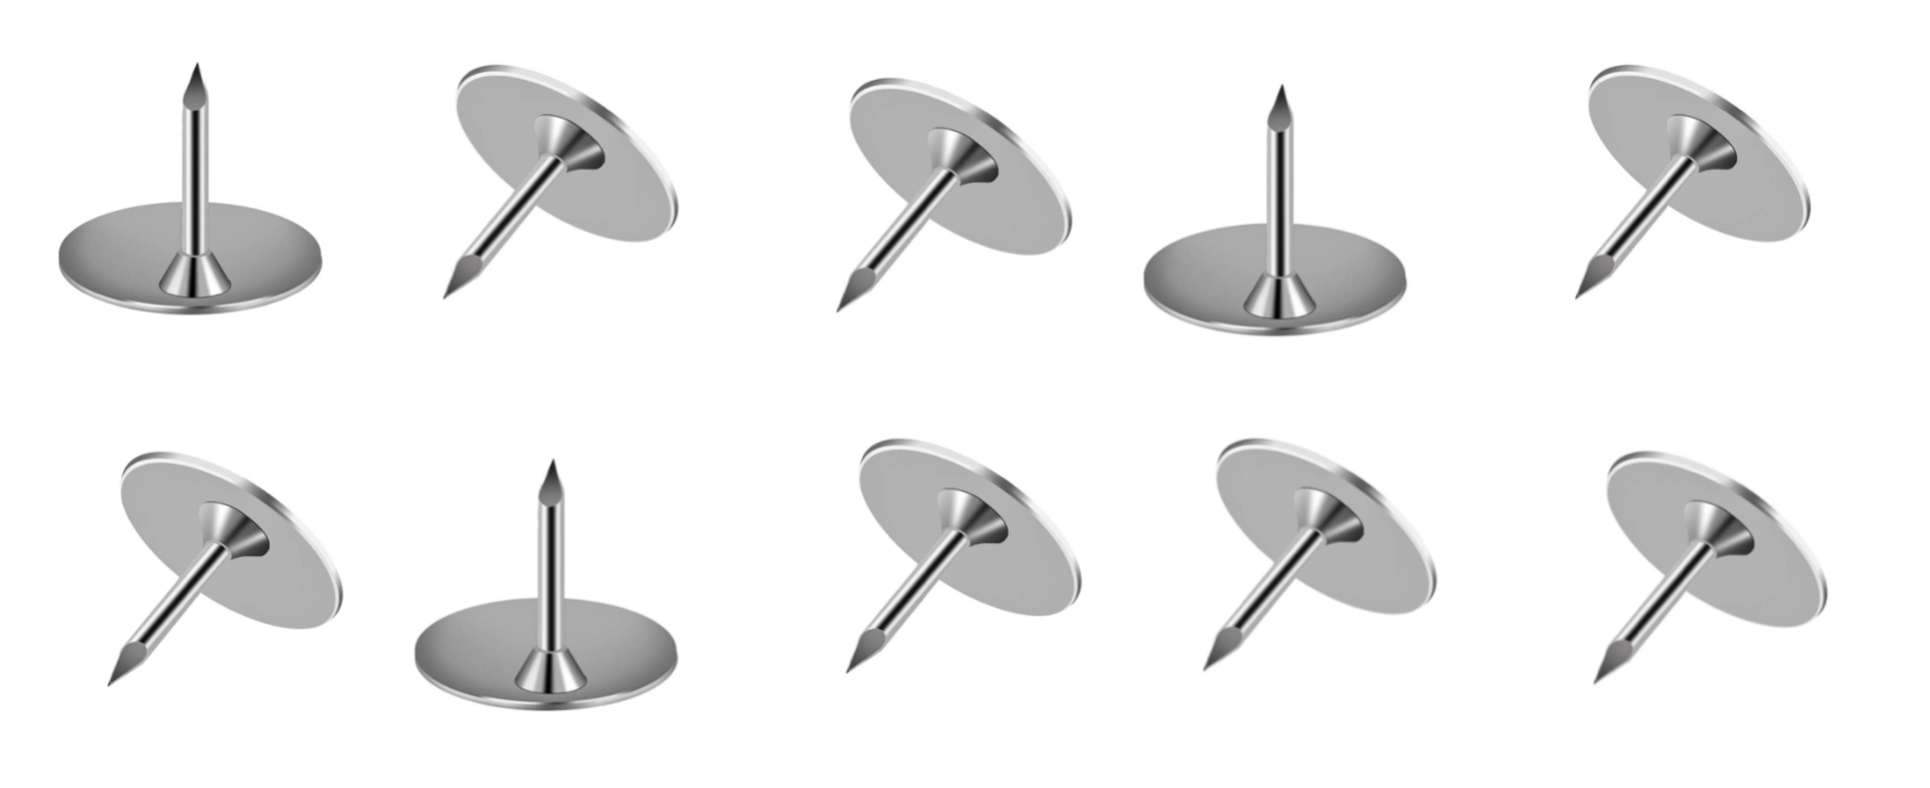
What is the probability of this thumbtack falling on its side?
        
<!-- ![image.png](attachment:image.png) -->

## Estimating Probabilities

We model the thumbtack falling on its side as a random variable $X$.

Each flip of the returns a Boolean value for X, that follows a Bernouilli distribution with parameter $\theta$:

$$ X\sim \text{Bernouilli} (\theta)$$

$P(X=1) = \theta$

$P(X=0) = 1-\theta$

We have observed the thumbtack falling on its side (X=1) 7 times and the thumbtack falling on its back (X=0) 3 times.

How can we estimate $\theta$ (the probability of the thumbtack falling on its side.)


## Maximum Likelihood Estimation

The first principle we will use is the principle of Maximum Likelihood Estimation (MLE).

MLE chooses the parameter $\hat\theta$ that **maximize the probability of the observed data $P(\text{data}|\hat\theta)$**



## Maximum Likelihood Estimation for Bernouilli Variables

$P(X=1) = \theta$

$P(X=0) = 1-\theta$

We refer to observed data as $D:\{1,0,1,0,0,...,1\}$ 

Throwing the thumbtack produces data $D$ with $\alpha_1$ side falls (X=1) and $\alpha_0$ back falls (X=0).

Throws are Independently Identically Distributed (IID).

What is $P(D|\theta)$?


## Maximum Likelihood Estimation for Bernouilli Variables

$P(X=1) = \theta$

$P(X=0) = 1-\theta$

We refer to observed data as $D:\{1,0,1,0,0,...,1\}$ 

Throwing the thumbtack produces data $D$ with $\alpha_1$ side falls (X=1) and $\alpha_0$ back falls (X=0).

Throws are Independently Identically Distributed (IID).

\begin{eqnarray} P(D|\theta) &= \theta  (1-\theta) ...\theta \\
&= \theta^{\alpha_1} (1-\theta)^{\alpha_0}\end{eqnarray}


MLE chooses the parameter $\hat\theta$ that **maximize the likelihood of the observed data $P(D|\hat\theta)$**

## Maximum Likelihood Estimation for Bernouilli Variables

MLE chooses the parameter $\hat\theta_{\text{MLE}}$ that **maximize the likelihood of the observed data $P(D|\hat\theta)$**

\begin{eqnarray} \hat\theta_{\text{MLE}}&=& \underset{\theta}{\operatorname{argmax}} P(D|\theta)  \\
\hat\theta_{\text{MLE}}&=& \underset{\theta}{\operatorname{argmax}} \theta^{\alpha_1} (1-\theta)^{\alpha_0}\end{eqnarray}


How to find $\hat\theta_{\text{MLE}}$ ?

## Maximum Likelihood Estimation for Bernouilli Variables

MLE chooses the parameter $\hat\theta_{\text{MLE}}$ that **maximize the likelihood of the observed data $P(D|\hat\theta)$**

\begin{eqnarray} \hat\theta_{\text{MLE}}&=& \underset{\theta}{\operatorname{argmax}} P(D|\theta)  \\
\hat\theta_{\text{MLE}}&=& \underset{\theta}{\operatorname{argmax}} \ln P(D|\theta)\\
\end{eqnarray}




## Maximum Likelihood Estimation for Bernouilli Variables

MLE chooses the parameter $\hat\theta_{\text{MLE}}$ that **maximize the <font color='blue'> log </font> likelihood of the observed data $P(D|\hat\theta)$**

\begin{eqnarray}
\hat\theta_{\text{MLE}}&=& \underset{\theta}{\operatorname{argmax}} \ln P(D|\theta)\\
&=& \underset{\theta}{\operatorname{argmax}} \ln \big(\theta^{\alpha_1} (1-\theta)^{\alpha_0}\big)
\end{eqnarray}



## Maximum Likelihood Estimation for Bernouilli Variables

MLE chooses the parameter $\hat\theta_{\text{MLE}}$ that **maximize the log likelihood of the observed data $P(D|\hat\theta)$**


\begin{eqnarray} 
\hat\theta_{\text{MLE}}&=& \underset{\theta}{\operatorname{argmax}} \ln P(D|\theta)\\
&=& \underset{\theta}{\operatorname{argmax}} \ln \big(\theta^{\alpha_1} (1-\theta)^{\alpha_0}\big)
&=& \underset{\theta}{\operatorname{argmax}}  [\alpha_1 \ln \theta + \alpha_0 \ln(1-\theta)]
\end{eqnarray}



## Maximum Likelihood Estimation for Bernouilli Variables


\begin{eqnarray} 
\hat\theta_{\text{MLE}}&=&  \underset{\theta}{\operatorname{argmax}} [\alpha_1 \ln \theta + \alpha_0 \ln(1-\theta)]
\end{eqnarray}

Take the derivative and set it to 0:

\begin{eqnarray} 
\frac{d}{d\theta} \ln P(D|\theta) &=& \frac{d}{d\theta} [ \alpha_1 \ln \theta + \alpha_0 \ln(1-\theta) ] = 0
\end{eqnarray}



## Maximum Likelihood Estimation for Bernouilli Variables


\begin{eqnarray} 
\hat\theta_{\text{MLE}}&=&  \underset{\theta}{\operatorname{argmax}} [\alpha_1 \ln \theta + \alpha_0 \ln(1-\theta)]
\end{eqnarray}

Take the derivative and set it to 0:

\begin{eqnarray} 
\frac{d}{d\theta} \ln P(D|\theta) &=& \frac{d}{d\theta} [ \alpha_1 \ln \theta + \alpha_0 \ln(1-\theta) ] = 0
\end{eqnarray}

Recall $$\frac{d}{d\theta} \ln \theta = \frac{1}{\theta}$$

$$\frac{d}{d\theta} f(g(\theta)) = g'(\theta) f'(g(\theta))$$


## Maximum Likelihood Estimation for Bernouilli Variables


\begin{eqnarray} 
\hat\theta_{\text{MLE}}&=&  \underset{\theta}{\operatorname{argmax}} [\alpha_1 \ln \theta + \alpha_0 \ln(1-\theta)]
\end{eqnarray}

Take the derivative and set it to 0:

\begin{eqnarray} 
\frac{d}{d\theta} \ln P(D|\theta) &=& \frac{d}{d\theta} [ \alpha_1 \ln \theta + \alpha_0 \ln(1-\theta) ]\\
&=&  \frac{\alpha_1}  {\theta} - \frac{\alpha_0} {(1-\theta)} 
\end{eqnarray}

## Maximum Likelihood Estimation for Bernouilli Variables


#### Summary:

Random Variable $X\sim \text {Bernouilli}(\theta)$, i.e. $P(X=1) = \theta$ and $P(X=0) = 1-\theta$.

We can write $P(X) =  \theta^X (1-\theta)^{1-X}$

We observe data $D$. We observe $X=1$  $\alpha_1$ times and $X=0$  $\alpha_0$ times.

$ P(D|\theta) =  \theta^{\alpha_1} (1-\theta)^{\alpha_0}$.

We can estimate:

\begin{eqnarray} \hat\theta_{\text{MLE}}&=& \underset{\theta}{\operatorname{argmax}} P(D|\theta) = \frac{\alpha_1}{\alpha_0+\alpha_1}\end{eqnarray}

## Probability Bound

In our example, we estimate $\hat\theta_{\text{MLE}} = 7/10$. We only threw the thumbtack 10 times.

How much can we trust this estimate?

#### Use Hoeffding Inequality

Given $X\sim \text {Bernouilli}(\theta)$, and $D$ consisting of $n$ IID samples where $X=1$ is observed $\alpha_1$ times and $X=0$ is observed $\alpha_0$ times, we have the guarantee:


\begin{eqnarray}\text{For any } \epsilon >0, ~ ~ ~ ~ P(|\hat\theta_{\text{MLE}} - \theta|\ge \epsilon) \le 2 \text{e}^{-2n\epsilon^2}\end{eqnarray}

In [6]:
import numpy as np

epsilon = 0.05
n = 1000

p_mistake = 2*np.exp(-2*n*epsilon**2)

print("the probability of making a mistake greater than {} is less than {}".format(epsilon, p_mistake))
print("the probability of making a mistake at most {} is more than {}".format(epsilon, 1- p_mistake))


the probability of making a mistake greater than 0.05 is less than 0.013475893998170922
the probability of making a mistake at most 0.05 is more than 0.986524106001829


#### Hoeffding Inequality

\begin{eqnarray}\text{For any } \epsilon >0, ~ ~ ~ ~ P(|\hat\theta_{\text{MLE}} - \theta|\ge \epsilon) \le 2 \text{e}^{-2n\epsilon^2}\end{eqnarray}

#### High Probability Bound 

If we want to know how many flips we need to estimate parameter $\theta$ with error at most $\epsilon$ with a probability of $1-\delta$.

For example: estimate parameter $\theta$ with error at most 0.01 with a probability of $0.99$.

\begin{eqnarray}\text{For any } \epsilon >0, ~ ~ ~ ~ P(|\hat\theta_{\text{MLE}} - \theta|\ge \epsilon) \le 2 \text{e}^{-2n\epsilon^2} \le \delta\end{eqnarray}

How may flips do we need?

#### Hoeffding Inequality

\begin{eqnarray}\text{For any } \epsilon >0, ~ ~ ~ ~ P(|\hat\theta_{\text{MLE}} - \theta|\ge \epsilon) \le 2 \text{e}^{-2n\epsilon^2}\end{eqnarray}

#### High Probability Bound 

If we want to know how many flips we need to estimate parameter $\theta$ with error at most $\epsilon$ with a probability of $1-\delta$.

For example: estimate parameter $\theta$ with error at most 0.05 with a probability of $0.95$.

\begin{eqnarray}\text{For any } \epsilon >0, ~ ~ ~ ~ P(|\hat\theta_{\text{MLE}} - \theta|\ge \epsilon) \le 2 \text{e}^{-2n\epsilon^2} \le \delta\end{eqnarray}

How may flips do we need?

$$  n \ge \frac{\ln \frac{2}{\delta}}{2\epsilon^2}$$

In [5]:
epsilon = 0.05
delta = 0.1
minimum_n = int(np.ceil(np.log(2/delta)/(2*epsilon**2)))
print("the minimum number of flips is {}".format(minimum_n))

the minimum number of flips is 600


## Estimating Probabilities

Let's go back to the original example. We threw the thumbtack 10 times, it landed 7 times on its head and 3 times on its back.

What if instead I told you that you take a coin from your pocket, you flip it lands 7 times on heads and 3 times on tails.

What is $\theta$, the probability of heads?


## Estimating Probabilities

You have a strong prior belief for the coin being fair. As an example of your prior distribution:

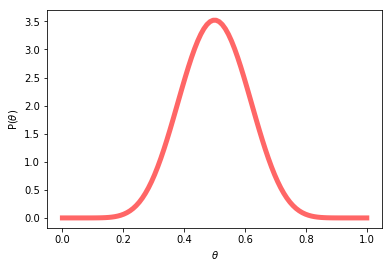

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import beta
beta1 = 10
beta0 = 10
x = np.linspace(0,1, 100)
plt.plot(x, beta.pdf(x, beta1,beta0), 'r-', lw=5, alpha=0.6, label='beta pdf')
plt.xlabel(r'$\theta$');plt.ylabel(r'P($\theta$)');

## Bayes Rule

Recall $P(A, B) = P(A|B)P(B) = P(B|A)P(A)$

We use this to state:


$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$


<!-- ![image-2.png](attachment:image-2.png) -->


In our context:


$$ P(\theta|D) = \frac{P(D|\theta)P(\theta)}{P(D)} $$


## Bayes Rule

$$ P(\theta|D) = \frac{P(D|\theta)P(\theta)}{P(D)} $$

$P(D|\theta)$ is the **likelihood** of the data, $P(\theta)$ is the **prior** probability  and $ P(\theta|D) $ is the **posterior** probability of the parameter $\theta$.

Because $P(D)$ is constant for different values of $\theta$, it is often omitted. In that case we don't compute the exact value of the posterior but we can compare it for different values of $\theta$:


$$ P(\theta|D) \propto P(D|\theta)P(\theta) $$



## MAP estimation

The second principle we will use is the principle of Maximum A-posteriori Probability (MAP) Estimation.

MAP estimation chooses the parameter $\hat\theta_{\text{MAP}}$ that **maximize the posterior probability $P(\hat\theta|\text{data})$**

\begin{eqnarray} \hat\theta_{\text{MAP}}&=& \underset{\theta}{\operatorname{argmax}}  P(\theta|D)  =  \underset{\theta}{\operatorname{argmax}}  P(D|\theta)P(\theta) \end{eqnarray}


Compare this with MLE, which chooses the parameter $\hat\theta_{\text{MLE}}$ that **maximize the likelihood of the observed data $P(D|\hat\theta)$**

\begin{eqnarray} \hat\theta_{\text{MLE}}&=& \underset{\theta}{\operatorname{argmax}} P(D|\theta) \end{eqnarray}

## How to choose a prior?

- Uniform / uninformative prior: constant for all values of $\theta$ ==> similar to MLE.
- Can represent the prior belief
- Conjugate prior: $P(\theta)$ and $P(\theta|D)$ have same form (will see soon)


For our problem with a binomial likelihood ($X$ is bernouilli and $D$ binomial), the beta distribution is very useful. It has parameters $\beta_H$ and $\beta_T$ which can represent the prior probability.

$$P(\theta) = \frac{\theta^{\beta_H-1}(1-\theta)^{\beta_T-1}}{B(\beta_H,\beta_T)}$$

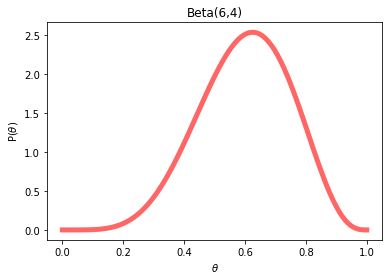

In [10]:
beta_H = 6
beta_T = 4

plt.plot(x, beta.pdf(x, beta_H,beta_T), 'r-', lw=5, alpha=0.6, label='beta pdf')
plt.xlabel(r'$\theta$');plt.ylabel(r'P($\theta$)'), plt.title('Beta({},{})'.format(beta_H,beta_T)); 

## MAP estimation

Assume you observe data $D$ with $\alpha_H$ heads and $\alpha_T$ tails:



\begin{eqnarray} P(\theta|D) &\propto&  P(D|\theta)P(\theta)  \\
&=&  \theta^{\alpha_H}(1-\theta)^{\alpha_T}  \frac{\theta^{\beta_H-1}(1-\theta)^{\beta_T-1}}{B(\beta_H,\beta_T)}  \\
&\propto& \theta^{\alpha_H+\beta_H-1}(1-\theta)^{\alpha_T+\beta_T-1}
\end{eqnarray}

$P(\theta|D)$ is a Beta distribution with parameters $\alpha_H+\beta_H$ and $\alpha_T+\beta_T$. 

Both the prior and posterior are of the same family. A binomial likelihood with a Beta prior gives a Beta posterior.

There are many other combinations of prior and likelihood functions that lead to a conjugate prior. 

## MAP estimation

\begin{eqnarray} \hat\theta_{\text{MAP}}&=& \underset{\theta}{\operatorname{argmax}}  P(\theta|D) \\  
&=&  \underset{\theta}{\operatorname{argmax}} \theta^{\alpha_H+\beta_H-1}(1-\theta)^{\alpha_T+\beta_T-1} \\
&=& \underset{\theta}{\operatorname{argmax}}  \ln [\underset{\theta}{\operatorname{argmax}} \theta^{\alpha_H+\beta_H-1}(1-\theta)^{\alpha_T+\beta_T-1}]
\end{eqnarray}


We already know how to solve this: $$\underset{\theta}{\operatorname{argmax}} = \frac{\alpha_H+\beta_H-1}{(\alpha_H+\beta_H-1) + (\alpha_T+\beta_T-1)} $$

Notice how the prior acts as additional coin flips:
- prior influences the value of $\theta_{\text{MAP}}$
- prior can be strong or weak (high or low $\beta_H$ and $\beta_T$) 
- a large amount of data will reduce the effect of the prior

(Text(0, 0.5, 'P($\\theta$|D)'),)

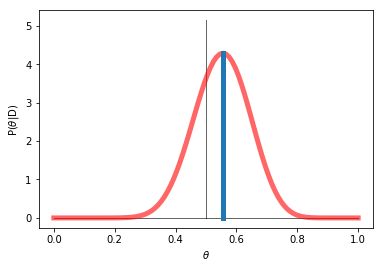

In [14]:
alpha_H = 6; alpha_T = 3
beta_H = 10; beta_T = 10
map_pdf = beta.pdf(x, alpha_H + beta_H, alpha_T+ beta_T)
map_value = x[np.argmax(map_pdf)]


plt.plot([0,1],[0,0], 'k', lw=1, alpha=0.6)
plt.plot([0.5,0.5],[0,np.max(map_pdf)*1.2], 'k', lw=1, alpha=0.6)
plt.plot(x, map_pdf, 'r-', lw=5, alpha=0.6, label='beta pdf')
plt.plot([map_value,map_value],[0,np.max(map_pdf)],lw=5)
plt.xlabel(r'$\theta$');plt.ylabel(r'P($\theta$|D)'), #plt.title('Beta({},{})'.format(beta_H,beta_T)); 

## MAP estimation for other distributions

#### Multinomial likelihood and Dirichlet prior distribution:

We roll a dice with 6 sides. The data $D$ we observe consists of counts $\alpha_1$, $\alpha_2$ .. $\alpha_6$ of observing each of the sides respectively.

The data is $\sim\text{Multinomial}(\theta_1,\theta_2,...,\theta_k)$. $\theta$ is a parameter vector with k entries ($\theta_1,\theta_2,...,\theta_k$) (6 in the case of a dice).

$$P(D|\theta) = \theta_1^{\alpha_1}\theta_2^{\alpha_2}...\theta_k^{\alpha_k} .$$

We choose a Dirichlet prior $\theta\sim\text{Dirichlet}(\beta_1,...\beta_k)$
$$P(\theta) = \frac{\prod_{i=1}^k \theta_i^{\beta_i-1}}{B(\beta_1,...\beta_k)}.$$

The posterior is also a Dirichlet: $\theta\sim\text{Dirichlet}(\alpha_1+\beta_1,...\alpha_k+\beta_k)$.

The mode of this distribution is $\hat \theta_{\text{MAP}}$ where the $i$th element is $\frac{\alpha_i+\beta_i-1}{\sum_{k=1}^K (\alpha_k+\beta_k) - K}$.


For a Multinomial likelihood, the conjugate prior is Dirichlet.

### Continuous Variables

#### Likelihood and prior are normal distributions.

Assume $X\sim\text{N}(\mu, \sigma)$

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \text{e}^{- \frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}}$$

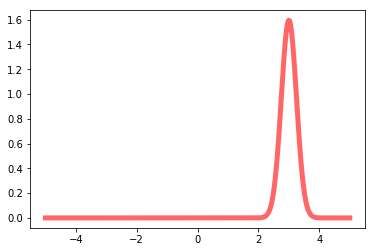

In [19]:
from scipy.stats import norm
mu = 3
sigma = 0.25
x = np.linspace(-5,5, 1000)
plt.plot(x, norm.pdf(x, mu,sigma), 'r-', lw=5, alpha=0.6, label='beta pdf')

### MLE estimation for mean of gaussian

You observe $n$ IID samples $D = \{x_1, x_2, ... x_n\}$.

\begin{eqnarray}
P(D|\mu,\sigma)&=&\prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} ~ \text{exp} \big( {-\frac{(x_i-\mu)^2}{2\sigma^2}}\big)\\
&=& \big(\frac{1}{\sigma\sqrt{2\pi}}\big)^n  ~ ~ \text{exp} \big( {-\frac{ \sum_{i=1}^n(x_i-\mu)^2}{2\sigma^2}}\big )\\
\end{eqnarray}

We want to find $\mu_{\text{MLE}}$:



### MLE estimation for mean of gaussian

You observe $n$ IID samples $D = \{x_1, x_2, ... n_n\}$.

\begin{eqnarray}
P(D|\mu,\sigma)&=&\prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} ~ \text{exp} \big( {-\frac{(x_i-\mu)^2}{2\sigma^2}}\big)\\
&=& \big(\frac{1}{\sigma\sqrt{2\pi}}\big)^n  ~ ~ \text{exp} \big( {-\frac{ \sum_{i=1}^n(x_i-\mu)^2}{2\sigma^2}}\big )\\
\end{eqnarray}

We want to find $\mu_{\text{MLE}}$:

\begin{eqnarray}
\frac{d}{d \mu}\ln P(D|\mu,\sigma) =  \frac{d}{d \mu} \ln \text{exp} \big( {-\frac{ \sum_{i=1}^n(x_i-\mu)^2}{2\sigma^2}}\big) =  \frac{d}{d \mu} {-\frac{ \sum_{i=1}^n(x_i-\mu)^2}{2\sigma^2}} =  \frac{\sum_{i=1}^n(x_i-\mu)} {\sigma^2} \\
\end{eqnarray}

Setting to $0$ and solving gives $$ \mu_{\text{MLE} } = \frac{\sum_{i=1}^n x_i} {n}$$

### MAP estimation for mean of gaussian

Using a normal prior for $\mu\sim N(\mu_0, \sigma_0)$ results in a normal posterior as well.

(Can do it on your own).

### What you should know:

- revise concepts of joint / marginal / conditional probability
- bayes rule
- MLE estimation principles
- MAP estimation principles
- Bernouilli, Binomial, Multinomial, Beta, Dirichlet and Normal distributions